<a href="https://colab.research.google.com/github/samartha007/Internship-The-Sparks-Foundation-/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project name- Prediction using Supervised Machine Learning Model
## Author Name -Sumit Nayek


In Colab before working with a data we have to import it from your local.We can do it by directly uploading it into the vm of Colab.I'm providing a screen shot for better understanding.

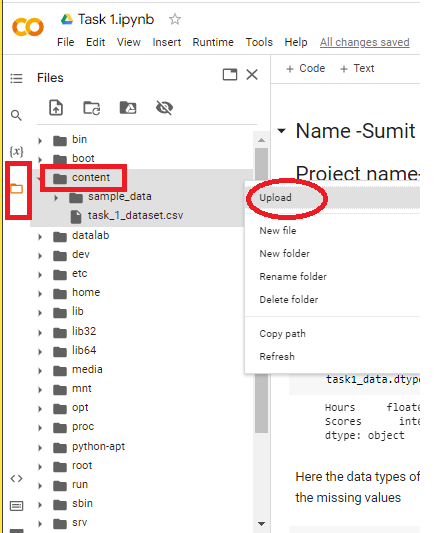

In [ ]:
## After Uploading the data in 'content'
## Loading the data
import pandas as pd
task1_data=pd.read_csv('/content/task_1_dataset.csv')
task1_data.dtypes

Hours     float64
Scores      int64
dtype: object

Here the data types of the variables are perfect dosen't taking any extra space in pandas .So we don't have to change the types.Now we go for the missing values

In [ ]:
task1_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

The data set has no missing values .Now we will check the distribution of the variables

Text(0.5, 1.0, 'Histogram of Study hour')

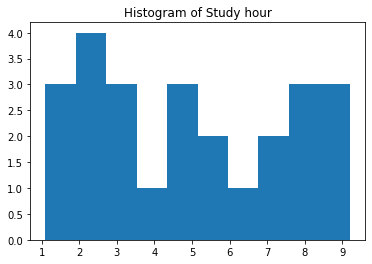

In [ ]:
import matplotlib.pyplot as plt
plt.hist(task1_data.Hours)
plt.title("Histogram of Study hour")

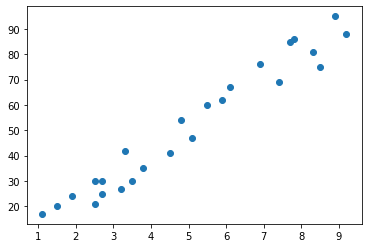

In [ ]:
plt.scatter(task1_data.Hours,task1_data.Scores)

we can clearly see that there is a linear relationship between hour of study and the socre obtain in exam.

In [ ]:
import numpy as np
pearson_coefficient=np.corrcoef(task1_data.Hours,task1_data.Scores)
print("The pearson's coeffient of the Hours of Study and Scores obtain in exam are: \n" ,pearson_coefficient)


The pearson's coeffient of the Hours of Study and Scores obtain in exam are: 
 [[1.         0.97619066]
 [0.97619066 1.        ]]


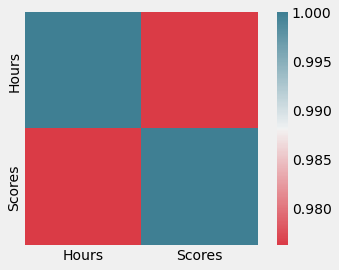

In [ ]:
### Plot of the above correlation matrix
import seaborn as sns
corr = task1_data.corr()
ax = sns.heatmap(
    corr, 
    cmap=sns.diverging_palette(10, 220, n=200),
    square=True
)

Here we can clealrly says that the variables are strongly correlated.

In [ ]:
import numpy as np
from sklearn import linear_model, metrics
X=np.array(task1_data.Hours).reshape((-1, 1))
y=task1_data.Scores
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)
  
# create linear regression object
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_train, y_train)
  
# regression coefficients
print('Slope: ', reg.coef_)
print(f"intercept: {reg.intercept_}")  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))


Slope:  [10.21834752]
intercept: 0.13417088316463577
Variance score: 0.9130017450458736


#### As from the fitted line we get the solpe of 10.22 and intercept of 0.13 which means that When the study hour is Zero one student can still score nearly 10.22 .The Intercept 0.13 means that if a student study for one hour he/she can gain score by 0.13 times.Here the R square value or the Variance Score is nearly one ehich clearly saying that the linear model is a good fit to the data.In Other words it explaning the 91% of variation in response

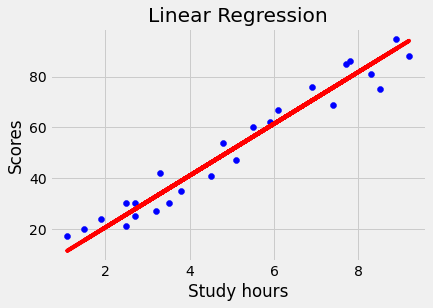

In [ ]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'blue')
  
plt.plot(X, reg.predict(X), color = 'red')
plt.title('Linear Regression')
plt.xlabel('Study hours')
plt.ylabel('Scores')
  
plt.show()

Text(0.5, 1.0, 'Residual errors')

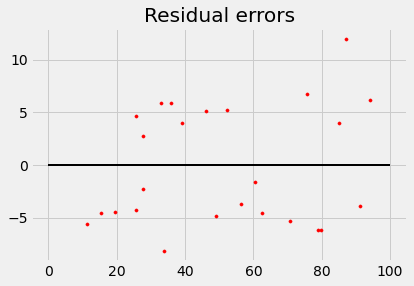

In [ ]:
# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(reg.predict(X), reg.predict(X) - y,
            color = "red", s = 10)
  

## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 100, linewidth = 2)
  
# ## plotting legend
# plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call 

## Interpretaion of the Result of the linear regression
Form the resedual plot we can see that the residuals are sactter all over the line .In Simple words the residual plot show the differnce between the observe and fitted value differences.A Ideal plot will show a random scatterness of points with a constant width around the identity line which we can clearly see in this plot.

In [ ]:
### Prediction using the Model
## For a student studied 9.25 hour 
import numpy as np
s=np.array([9.25]).reshape(-1,1)
print('The Student Score will be :',reg.predict(s))

The Studen Score will be : [94.65388541]


### Just for own experimental knowladge 

In [ ]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)
  
poly.fit(X_poly, y_train)
lin2 = linear_model.LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression()

In [ ]:
# regression coefficients
print('Slope: ', lin2.coef_)
print(f"intercept: {lin2.intercept_}")  
# variance score: 1 means perfect prediction
X_poly = poly.fit_transform(X_test)
print('Variance score: {}'.format(lin2.score(X_poly, y_test)))

Slope:  [0.         9.57049683 0.05956521]
intercept: 1.5236216201817854
Variance score: 0.9133504923732467


### The change in the accuracy/variance is very very less 

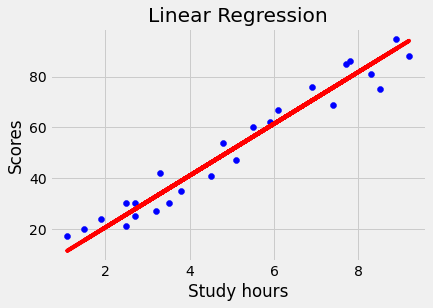

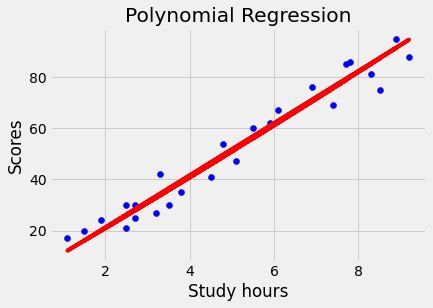

In [ ]:

# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'blue')
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Study hours')
plt.ylabel('Scores')
  
plt.show()

### Both plots are looking simillar .So we don't have to go for ploynomial regression

Text(0.5, 1.0, 'Residual errors')

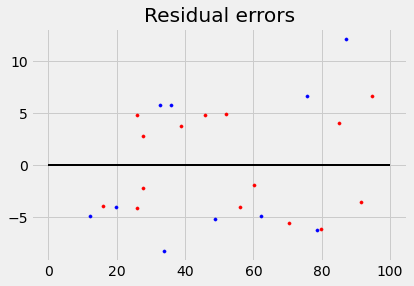

In [ ]:
# After the ploynomial regression we see the plot for residual error
  
## setting plot style
# plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(lin2.predict(poly.fit_transform(X_train)), lin2.predict(poly.fit_transform(X_train)) - y_train,
            color = "red", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(lin2.predict(poly.fit_transform(X_test)),lin2.predict(poly.fit_transform(X_test))- y_test, color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 100, linewidth = 2)
  
# ## plotting legend
# plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")